In [22]:
import random as rd

Variant = 23
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(14),3)]
Numbers_of_problems

[13, 5, 2]

Задание 5 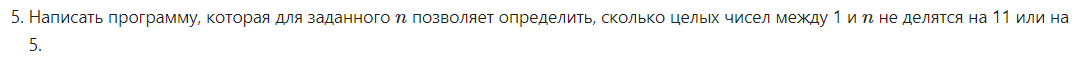

In [ ]:
#include <stdio.h>

int main() {
    int n;
    int count = 0;

    // Ввод числа n
    printf("Введите число n: ");
    scanf("%d", &n);

    for (int i = 1; i <= n; i++) {
        if (i % 5 != 0 && i % 11 != 0) {
            count++; 
        }
    }

    printf("Количество целых чисел между 1 и %d, которые не делятся на 5 или 11: %d\n", n, count);

    return 0;
}


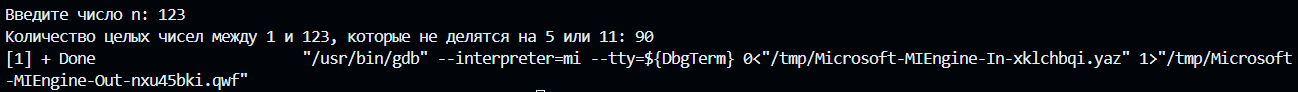

In [ ]:
format ELF64 

public _start 

public calcuate_numbers 
 
include 'func.asm' 
 
section '.data' 
symbol db '-' 
 
section '.bss' writable 
    place rb 255 
    answer rb 2 
     
section '.text' executable 
_start: 
    mov rsi, place 
    call input_keyboard 
    call str_number 
    call calcuate_numbers 
    mov rax, rdi 
    mov rsi, answer 
    call number_str 
    call print_str 
    call new_line 
    call exit 


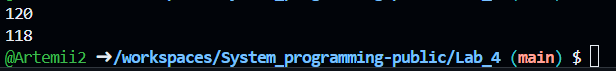

Задание 8 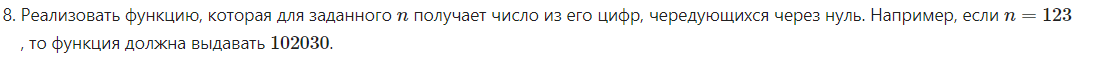

In [ ]:
#include <stdio.h>
#include <string.h>

void createAlternatingNumber(char *n) {
    char result[100] = ""; 
    int length = strlen(n);

    for (int i = 0; i < length; i++) {
        result[i * 2] = n[i]; 
        result[i * 2 + 1] = '0';
    }

    result[length * 2 + 1] = '\0'; 

    printf("Результат: %s\n", result);
}

int main() {
    char n[100];

    printf("Введите число n: ");
    scanf("%s", n);

    createAlternatingNumber(n);
    return 0;
}


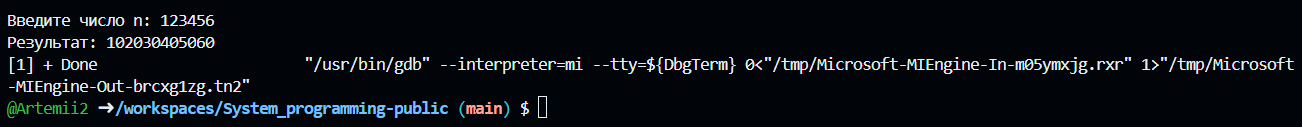

In [ ]:
format ELF64
public _start

msg dq 256

include 'func8.asm'

_start:
    mov rax, 0
    mov rdi, 0
    mov rsi, msg
    mov rdx, 256
    syscall
    call str_number
    call edit
    call print
    
edit:
    mov rax, rax
    mov rcx, 10
    xor rbx, rbx
    mov rdi, 1
    xor rsi, rsi
    step:
        xor rdx, rdx
        div rcx
        push rax
        xor rbp, rbp
        .step2:
            inc rbp
            mov rax, 10
            mov rdx, rdx
            mul rdx
            mov rdx, rax
            cmp rdi, rbp
            jne .step2
        add rsi, rdx
        pop rax
        inc rbx
        inc rdi
        inc rdi
        cmp rax, 0
        jne step
    ret


place db ?
print:
    mov rax, rsi
    mov rcx, 10
    xor rbx, rbx
    iter1:
      xor rdx, rdx
      div rcx
      add rdx, '0'
      push rdx
      inc rbx
      cmp rax, 0
    jne iter1
    iter2:
      pop rax
      call print_symbl
      dec rbx
      cmp rbx, 0
    jne iter2
 mov rax, 0xA
 call print_symbl
 call exit
 ret

print_symbl:
     push rbx
     push rdx
     push rcx
     push rax
     push rax
     mov rax, 4
     mov rbx, 1
     pop rdx
     mov [place], dl
     mov rcx, place
     mov rdx, 1
     int 0x80
     pop rax
     pop rcx
     pop rdx
     pop rbx
     ret



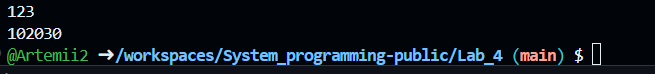

Задание 11 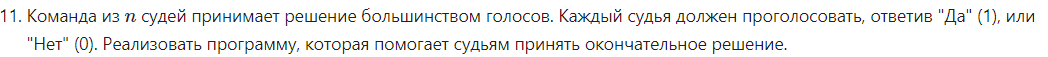

In [ ]:
#include <stdio.h>

int main() {
    int n;
    
    printf("Введите количество судей: ");
    scanf("%d", &n);
    
    int votes[n];
    int yesCount = 0;

    printf("Введите голоса судей (1 - Да, 0 - Нет):\n");
    for (int i = 0; i < n; i++) {
        scanf("%d", &votes[i]);
        if (votes[i] == 1) {
            yesCount++;
        }
    }

    if (yesCount > n / 2) {
        printf("Окончательное решение: Да\n");
    } else {
        printf("Окончательное решение: Нет\n");
    }

    return 0;
}


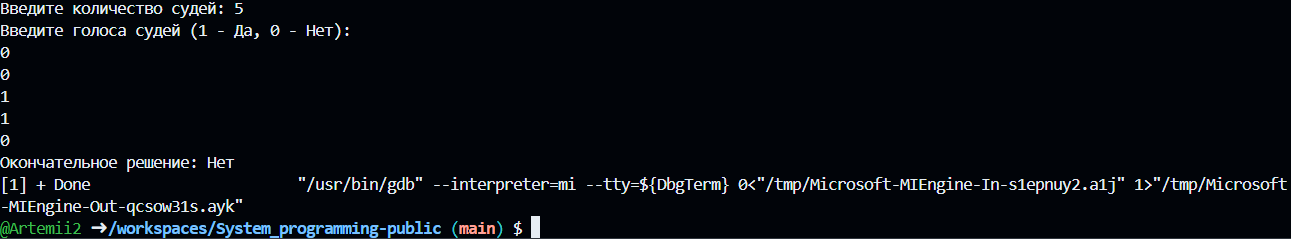

In [ ]:
format ELF64

public _start

include 'func11.asm' 

section '.bss' writable
    input: times 3 db ?
    positive db "Yes", 0
    negative db "No", 0
    neutral db "Equal", 0

section '.text' executable
_start:
    mov rsi, input
    mov rdx, 4
    call read
    call str_number
    xor rcx, rcx
    mov rcx, rax
    xor rbx, rbx
    mov rdx, 2
    .count_loop:
        call read
        inc rbx
        cmp byte [rsi], '0'
        jne @f
        sub rbx, 2
        @@:
        dec rcx
        cmp rcx, 0
        jne .count_loop
    cmp rbx, 0
    jne @f
    mov rsi, neutral
    jmp .finish
    @@:
    jl @f
    mov rsi, positive
    jmp .finish
    @@:
    mov rsi, negative
    .finish:
        call print_str
        call new_line
        call exit

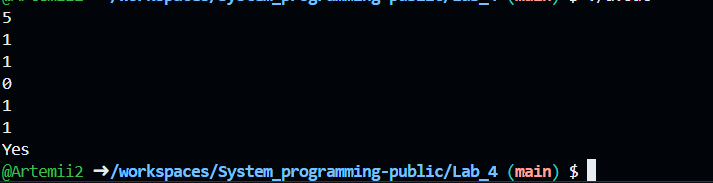